In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/lm/ht2dkcld0tn4b4c0hqznvyfr0000gn/T/ipykernel_18759/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./csp_accuracies.csv')

In [3]:
df

,Unnamed: 0,Calibration,Driving,Transfer with driving ICA,Transfer,Transfer with threshold
0,61.0,0.8875,0.744681,0.788640,0.790123,0.818898
1,66.0,0.8625,0.822034,0.334752,0.352666,0.616822
2,126.0,0.6625,0.744681,0.681301,0.581582,0.576471
3,280.0,0.5500,0.643357,0.425195,0.441373,0.472868
4,302.0,0.6500,0.491379,0.175884,0.208201,0.266667
5,336.0,0.5250,0.712500,0.054264,0.053640,0.319444
6,381.0,0.9000,0.853448,0.723463,0.734107,0.771429
7,406.0,0.6250,0.705036,0.508226,0.521058,0.658730
8,530.0,0.7875,0.422222,0.225116,0.384898,0.481481
9,587.0,0.6500,0.571429,0.448921,0.480293,0.373016


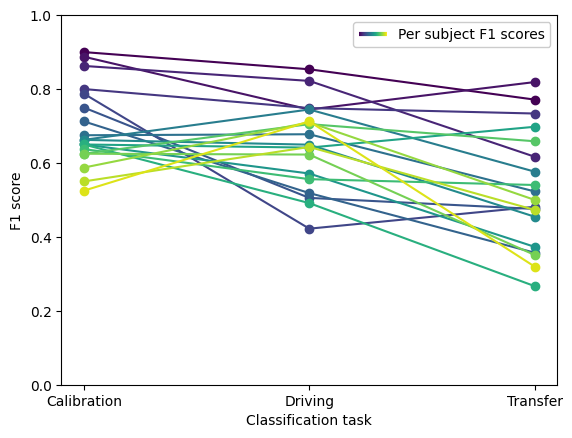

In [9]:
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

df.sort_values("Calibration", ascending=False)[["Calibration", "Driving", "Transfer with threshold"]].T.plot(colormap='viridis', marker='o' )
plt.ylim(0, 1)
plt.ylabel("F1 score")
plt.xlabel("Classification task")
plt.xticks([0, 1, 2], ["Calibration", "Driving", "Transfer"])

# x = np.linspace(0, 3 * np.pi, 500)
# y = np.sin(x)
# dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# # Create a set of line segments so that we can color them individually
# # This creates the points as an N x 1 x 2 array so that we can stack points
# # together easily to get the segments. The segments array for line collection
# # needs to be (numlines) x (points per line) x 2 (for x and y)
# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# norm = plt.Normalize(dydx.min(), dydx.max())
# lc = LineCollection(segments, cmap='viridis', norm=norm)
from matplotlib.legend_handler import HandlerLineCollection
from matplotlib.collections import LineCollection

class HandlerColorLineCollection(HandlerLineCollection):
    def create_artists(self, legend, artist ,xdescent, ydescent,
                        width, height, fontsize,trans):
        x = np.linspace(0,width,self.get_numpoints(legend)+1)
        y = np.zeros(self.get_numpoints(legend)+1)+height/2.-ydescent
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap=artist.cmap,
                     transform=trans)
        lc.set_array(x)
        lc.set_linewidth(artist.get_linewidth())
        return [lc]

t = np.linspace(0, 10, 2000)
x = np.cos(np.pi * t)
y = np.sin(t)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('viridis'),
                    norm=plt.Normalize(0, 10), linewidth=3)
lc.set_array(t)
ax = plt.gca()

# ax.add_collection(lc)

ax.get_legend().remove()

plt.legend([lc], ["Per subject F1 scores"],\
    handler_map={lc: HandlerColorLineCollection(numpoints=1000)}, framealpha=1)

# plt.violinplot(df[["Calibration", "Driving", "Transfer"]])



plt.savefig("per_subject_f1s.pdf")

# plt.legend([lc], ['Subjects'])

([<matplotlib.axis.XTick at 0x1373d5a90>,
 [Text(1, 0, 'Calibration'), Text(2, 0, 'Driving'), Text(3, 0, 'Transfer')])

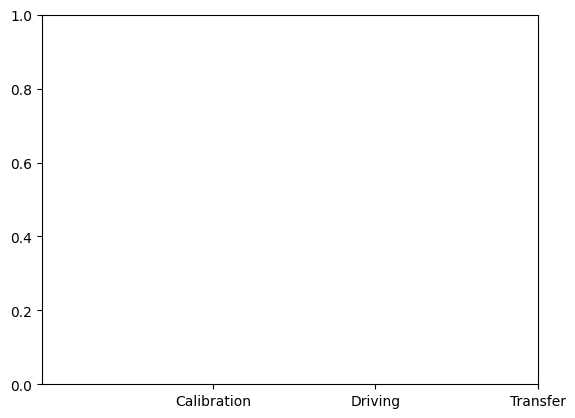

In [5]:
plt.violinplot(df[["Calibration", "Driving", "Transfer"]])
plt.ylim(0, 1)
plt.xticks([1, 2, 3], ["Calibration", "Driving", "Transfer"])

In [6]:
df

,Unnamed: 0,Calibration,Driving,Transfer with driving ICA,Transfer,Transfer with threshold
0,61.0,0.8875,0.744681,0.788640,0.790123,0.818898
1,66.0,0.8625,0.822034,0.334752,0.352666,0.616822
2,126.0,0.6625,0.744681,0.681301,0.581582,0.576471
3,280.0,0.5500,0.643357,0.425195,0.441373,0.472868
4,302.0,0.6500,0.491379,0.175884,0.208201,0.266667
5,336.0,0.5250,0.712500,0.054264,0.053640,0.319444
6,381.0,0.9000,0.853448,0.723463,0.734107,0.771429
7,406.0,0.6250,0.705036,0.508226,0.521058,0.658730
8,530.0,0.7875,0.422222,0.225116,0.384898,0.481481
9,587.0,0.6500,0.571429,0.448921,0.480293,0.373016
